In [67]:
import pandas as pd
from rich import print as rprint
from rich.text import Text
import string
from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline
import re
from matplotlib import pyplot as plt
import os

In [16]:
def makemydir(folder, file_parent):
  try:
    os.makedirs(file_parent + folder)
  except OSError:
    pass
  # let exception propagate if we just can't
  # cd into the specified directory

In [30]:
def clean_edition(issue_txt_original):
    #\s means all whitespace characters (regular spaces, tabs, etc.). Just putting in a space only gets regular spaces

    #sometimes boxes around a thing get turned into long chains of letters, usually i, so if there is a stretch of characters surrounded by spaces at least 20 long, remove it
    issue_txt = re.sub(r'[^\s]{20,}', " ", issue_txt_original)

    #words that are spread across multiple lines, marked with a dash to show continuation
    # this isn't perfect. There are lines where the line ends with a dash but the subsequent line is the start of a different paragraph. Like 20-30% of the time. Still worth it to do, but a reason to chop up the newspapers in the future.
    issue_txt = re.sub(r"-\s*\n+", "", issue_txt)

    #remove repeated stretches of certain kinds of punctuation
    # - and — are actually different! N and M dashes?
    issue_txt = re.sub(r'[.,_►<>♦❖\^\-\—\s]{6,}', " ", issue_txt)

    #possibly remove: ■ * • | «» ♦
    issue_txt = issue_txt.replace('■', "").replace("«", "").replace("»",  "")#.replace('*', " ").replace("•", " ").replace("|", " ").replace(" - ", " ")

    #remove SINGLE newlines
    issue_txt = re.sub(r'([^\n])(\n)([^\n])', r"\1 \3", issue_txt)
    #remove tabs, unrecognized characters
    issue_txt = re.sub(r'\t|\x0c', " ", issue_txt)

    #if there is a lowercase followed by a capital with no space between, insert one. Probably two words smushed together
    issue_txt = re.sub(r'([a-z])([A-Z])', r'\1 \2', issue_txt)

    #remove multiple spaces
    issue_txt = re.sub(' +', " ", issue_txt)

    #splitting on two or greater new lines
    issue_txt = re.sub(r'\n{3,}', "\n\n", issue_txt)

    #should we repalce "\'" with "’"? 
    #"^ is our most common non-standard character, but there is no consistency in what it actually is. Sometimes it is for e, other times for a, other times a space. Not sure how to deal wwith it."

    return issue_txt

In [5]:
all_maroon = pd.read_csv("all_issues.csv", index_col = [0])

In [31]:
file_parent = "cleaned_txt/"
issues_year = 1954
folder = str(issues_year) + "_cleaned"
makemydir(folder, file_parent)
year_txts = all_maroon[all_maroon.year == issues_year].txt.to_list()
year_tags = all_maroon[all_maroon.year == issues_year].tag.to_list()
i = 0
for txt, tag in zip(year_txts, year_tags):
    print(i)
    issue_txt_file = open(txt, "r", encoding='utf-8-sig') #need this encoding to dodge \ufeff
    issue_txt_original = issue_txt_file.read()
    print(len(issue_txt_original))
    issue_txt_file.close()
    issue_txt_clean = clean_edition(issue_txt_original)
    i+=1
    issue_txt_clean_file = file_parent + folder + "/" + tag + "_txt_clean.txt"
    with open(issue_txt_clean_file, "w") as text_file:
        text_file.write(issue_txt_clean)

0
32157
1
80742
2
82189
3
84709
4
77530
5
79794
6
125979
7
85839
8
70531
9
120000
10
114022
11
139544
12
81747
13
114107
14
113303
15
58069
16
111260
17
111173
18
19571
19
42741
20
41983
21
41860
22
193849
23
68184
24
116128
25
126175
26
118421
27
68016
28
104602
29
115829
30
57707
31
104883
32
103699
33
120216


In [21]:
issue_txt_clean

'SG elects Fortier president; by-law amendment adopted\n\nNew officer’s for the 1954-55 Student Government were the principal item of business for the first meeting of the new SG assembly last Tuesday.\n\nAl Fortier (ISL-col) was elected president of SG. Other officers elected were Emil John Writedns illegal, eight ballots void\n\nA major controversy in the re- Asked why he didn’t petition cent Student Government elec- and register as an official candison (ISL-col), vice-president; Sabina Wagner (ISL-col), secretary; and Pat Parker (ISLbus), treasurer.\n\nAn amendment to the SG by-laws was adopted which provides that any party receiving 25 per cent of the total vote in an SG election and holding a seat in the assembly is entitled to a committee-at-large, and thu S to a representative on the SG executive council. This gives the Student Representative party a seat on the council, which it would not otherwise have had.\n\nThe former by-law provided that any party with 20 per cent of the s

In [35]:
len(all_maroon.year.unique())

85

In [59]:
sum(all_maroon.year == 1986)

57

In [83]:
pd.DataFrame(pd.value_counts(all_maroon.year)).to_csv("issues_by_year.csv")

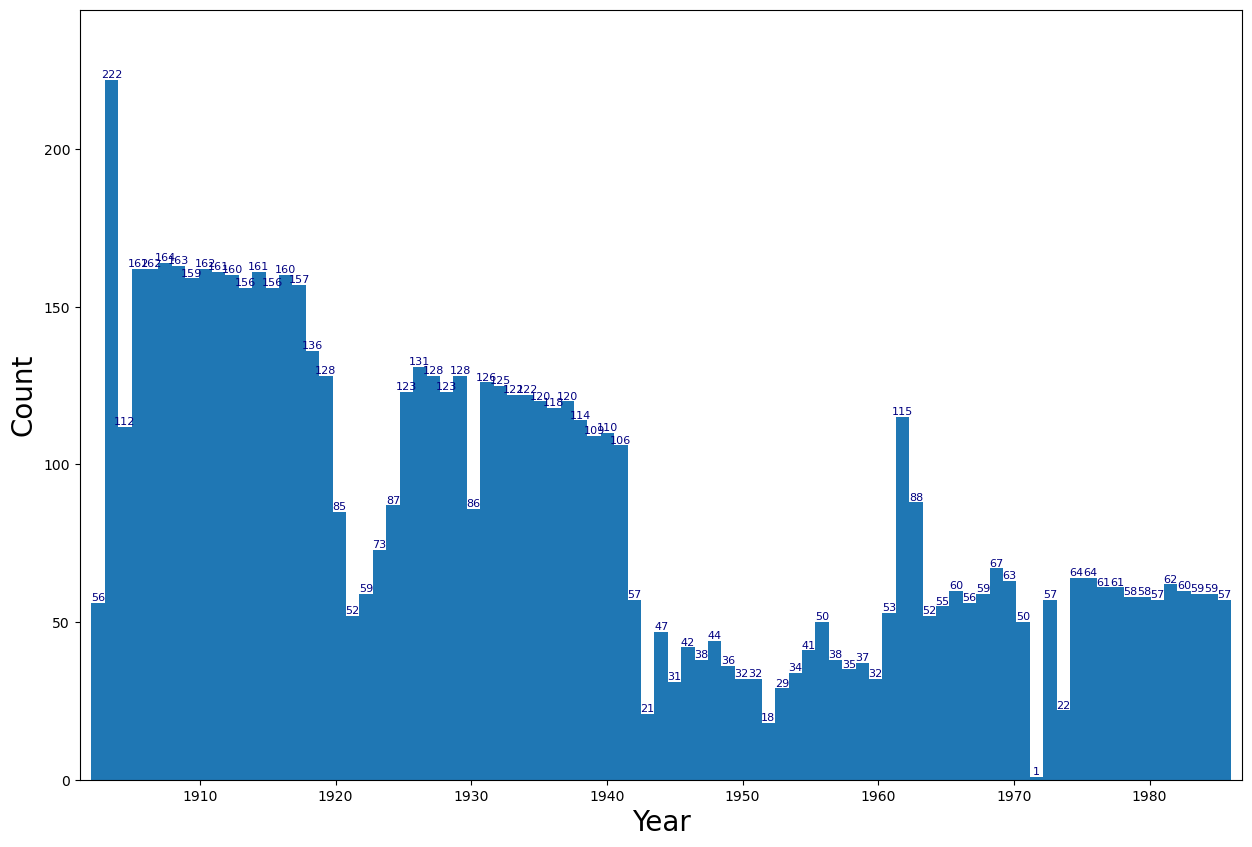

In [81]:
plt.figure(figsize=(15, 10))
values, bins, bars = plt.hist(all_maroon.year, bins = 85)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title = ('Number of Issues, 5 Year Bins')
plt.bar_label(bars, fontsize=8, color='navy')
plt.margins(x=0.01, y=0.1)
plt.show()